# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [3]:
import numpy as np
from scipy import optimize 
from matplotlib import pyplot as plt 
plt.style.use("seaborn") 
%matplotlib inline

import matplotlib.pyplot as plt # baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [4]:
# utility function 

"""defining parameters"""

mp ={'y':1,'p':0.2,'theta':-2} # just add parameters to this dictionary

"""defining functions"""

def premium(q,mp):
    return mp['p']*q

def utility(z,mp):
  
    return (z**(1+mp['theta']))/(1+mp['theta'])


def expected_utility(x, q, mp):

    z_1 = mp['y'] - x + q - premium(q,mp)
    z_2 = mp['y'] - premium(q,mp)

    return mp['p']*utility(z_1,mp)+(1-mp['p'])*utility(z_2,mp)



In [5]:
"""i. constructing a function, that finds the optimal q for given levels of x,y,p"""

x_guess=0.4 #an initial guess
N=10
q_optimal=np.linspace(0.0,x_guess,N)
u_vector = np.empty(N)

u_best = -np.inf # initial maximum
q_best = np.nan # not-a-number

for i,q in enumerate(q_optimal):
    u_now = u_vector[i] = expected_utility(x_guess, q, mp)
    if u_now>u_best:
        q_best=q
        u_best=expected_utility(x_guess, q, mp)
        
print(f'Optimal level with loop is {u_best:.3f} at q = {q_best:.3f}')


Optimal level with loop is -1.087 at q = 0.400


In [6]:
"""ii.+iii. - making a grid and optimizing for different levels of x""" 
N=10 #number of elements
x=np.linspace(0.01,0.9,N) # an array of N number of x's equally distributed in the range

for i in x:
    initial_guess = [i/2]
    obj = lambda q: -expected_utility(i, q, mp)
    res=optimize.minimize_scalar(obj, initial_guess, method="bounded",bounds=(1e-5,i))
    q_star=res.x 
 
    print(f"For x = {i:.3f} the optimal q is {q_star:.3f}")

For x = 0.010 the optimal q is 0.010
For x = 0.109 the optimal q is 0.109
For x = 0.208 the optimal q is 0.208
For x = 0.307 the optimal q is 0.307
For x = 0.406 the optimal q is 0.406
For x = 0.504 the optimal q is 0.504
For x = 0.603 the optimal q is 0.603
For x = 0.702 the optimal q is 0.702
For x = 0.801 the optimal q is 0.801
For x = 0.900 the optimal q is 0.900


Text(0.5, 1.0, 'Optimal coverage amount q as a function of monetary loss x')

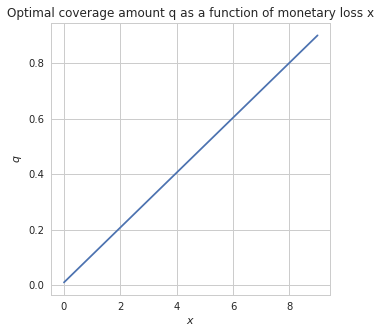

In [7]:
"""Plotting the x's and the q_star's"""
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

ax.plot(x)
ax.grid(True)

# b. add labels
ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.set_title('Optimal coverage amount q as a function of monetary loss x')


We see that it is optimal for the coverage amount to cover all monetary loss. 

# Question 2

In [8]:
mp['x']=0.6 #adding value of x to the dictionary with all the model parameters
print(mp) #checking to see that it is added

"""checking what the expected value for the uninsured is"""

def expected_utility_uninsured(mp):
    return mp['p']*utility(mp['y'] - mp['x'],mp)+(1-mp['p'])*utility(mp['y'],mp)

print("expected value for the uninsured is:")
print(expected_utility_uninsured(mp))


{'y': 1, 'p': 0.2, 'theta': -2, 'x': 0.6}
expected value for the uninsured is:
-1.3


In [9]:
def expected_utility_insured(q, mp, pi): #defining the utility function where pi is a variabel and not a function

    z_1 = mp['y'] - mp['x'] + q - pi
    z_2 = mp['y'] - pi

    return mp['p']*utility(z_1,mp)+(1-mp['p'])*utility(z_2,mp)

"""solving for pi at given level of q"""
def optimal(pi):
    return np.absolute(expected_utility_insured(q=0.02, mp=mp, pi=pi)-expected_utility_uninsured(mp))

sol = optimize.minimize_scalar(optimal, method='bounded', bounds=(0,0.6)) #we only look at the interval [0,0.6] 
pi = sol.x

print(pi)


0.012043720247529826


In [10]:
"""Constructing grid"""

N=10 #number of elements
q_vector=np.linspace(0.01,0.6,N) # an array of N number of x's equally distributed in the range
pi_vector = np.empty(N)

def optimal_grid(pi):
    return np.absolute(expected_utility_insured(q, mp, pi)-expected_utility_uninsured(mp))

for i, q in enumerate(q_vector):
    obj = lambda pi:-optimal_grid(pi)
    initial_pi_guess=[0.0]
    res = optimize.root(obj,initial_pi_guess)
    pi_vector[i]=res.x
  
    premium_pi=mp['p']*q_vector


In [11]:
print(premium_pi)

[0.002      0.01511111 0.02822222 0.04133333 0.05444444 0.06755556
 0.08066667 0.09377778 0.10688889 0.12      ]


In [12]:
print(pi_vector)

[0.00605971 0.04386667 0.07824501 0.10914156 0.13661871 0.16084454
 0.18206796 0.20058686 0.21671728 0.23076923]


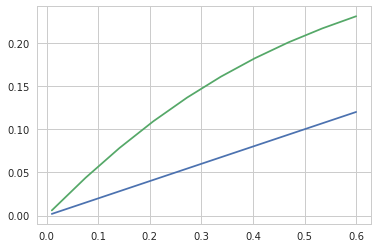

In [13]:
"""figure"""
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(q_vector,premium_pi)
ax.plot(q_vector,pi_vector)


Explain your code and procedure

# Question 3

Explain your code and procedure

In [14]:
# defining parameters
N = 10000
alpha = 2
beta = 7

# drawing from beta distribution
def MC(alpha,beta,N,gamma,pi):
    x = np.random.beta(alpha,beta,size=N)
    z_3=mp['y']-(1-gamma)*x-pi
    return np.mean(utility(z_3,mp))


v1 = MC(alpha,beta,N,gamma = 0.9, pi= 0.2)
v2 = MC(alpha,beta,N,gamma = 0.45, pi= 0.1)

if v1 > v2:
    print(v1)
else:
    print(v2)

-1.2860186033724534


# Question 4

ADD CONCISE CONLUSION.